In [21]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from scipy import stats
from tqdm import tqdm_notebook
from collections import Counter
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

thresholds = [.1, .25, .5, .75, 1.]
labels = ['CoH5_perc_10', 'CoH5_perc_25', 'CoH5_perc_50', 'CoH5_perc_75', 'CoH5_perc_100']

__author__ = 'HK Dambanemuya'
__version__ = 'Python 3'

In [16]:
herding_attributes = pd.read_csv('../Data/herding_attributes.csv')
herding_attributes = herding_attributes[herding_attributes.columns[1:]]
network_attributes = pd.read_csv('../Data/network_data.csv')
network_attributes = network_attributes[network_attributes.columns[:-1]]
temporal_herding = pd.read_csv('../Data/robust_herding_data.csv')
temporal_herding.rename(columns={'ListingKey': 'ProjectID'}, inplace=True)
data = network_attributes.merge(temporal_herding, on='ProjectID', how='left')
data = data.merge(herding_attributes, on='ProjectID', how='left')
data

,ProjectID,Nodes,Edges,Density,Degree,Closeness,Betweenness,CoH5_perc_10,CoH5_perc_25,CoH5_perc_50,CoH5_perc_75,CoH5_perc_100,AmountRequested,NumBids,AvgBid,Momentum,Variation,CoH1,CoH3,CoH5,ProsperScore,CreditGrade,DebtRatio,Homeowner,Description,Category,RepaidOrNot
0,00033425227988088FA6752,18,18,0.118,0.118,0.177,0.034,-2.000,-2.000,nan,-0.105,-0.114,1000.000,15.000,66.737,1.348,0.352,0.140,0.244,0.114,6.000,3.000,0.190,0.000,190.000,4.000,1.000
1,000433785890431972B4743,27,31,0.088,0.088,0.129,0.065,-2.000,-0.200,0.048,0.174,0.202,2550.000,30.000,85.000,2.319,0.686,0.213,0.199,0.202,-1.000,2.000,0.100,0.000,577.000,0.000,0.000
2,00083422661625108817246,179,318,0.020,0.020,0.119,0.027,-0.115,0.033,0.014,0.003,-0.014,3500.000,141.000,65.022,1.571,0.405,0.069,0.026,0.014,9.000,6.000,0.350,0.000,210.000,1.000,1.000
3,000A34209897973969CFA81,0,0,0.000,nan,nan,nan,-2.000,-2.000,-2.000,-2.000,-2.000,1500.000,2.000,775.000,0.000,0.935,2.000,2.000,2.000,7.000,2.000,0.040,0.000,134.000,4.000,1.000
4,000D3410451511356B08F17,227,365,0.014,0.014,0.141,0.015,-0.125,-0.044,-0.039,-0.041,-0.033,5000.000,239.000,78.903,3.596,0.619,0.028,0.025,0.033,3.000,6.000,0.190,0.000,273.000,5.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33962,FFED34041046082893720F9,401,663,0.008,0.008,0.063,0.024,-0.046,0.005,0.001,-0.003,-0.004,6000.000,338.000,85.412,1.843,1.438,0.001,0.008,0.004,10.000,8.000,0.110,1.000,249.000,0.000,1.000
33963,FFEE33900351819124B6EDE,80,97,0.031,0.031,0.053,0.005,nan,-0.050,0.010,0.018,0.019,8000.000,77.000,104.324,1.174,1.157,0.186,0.054,0.019,3.000,7.000,0.380,1.000,161.000,0.000,0.000
33964,FFF0338012502972731B2C1,8,8,0.286,0.286,0.430,0.238,-2.000,-2.000,-2.000,-0.121,-0.144,1000.000,12.000,86.540,1.451,0.922,0.202,0.219,0.144,-1.000,1.000,0.190,0.000,299.000,0.000,1.000
33965,FFF2348883637242825FB33,39,39,0.053,0.053,0.079,0.007,-2.000,0.138,-0.069,-0.076,-0.086,0.000,0.000,0.000,0.000,0.000,0.094,0.087,0.086,0.000,0.000,0.000,0.000,0.000,0.000,0.000


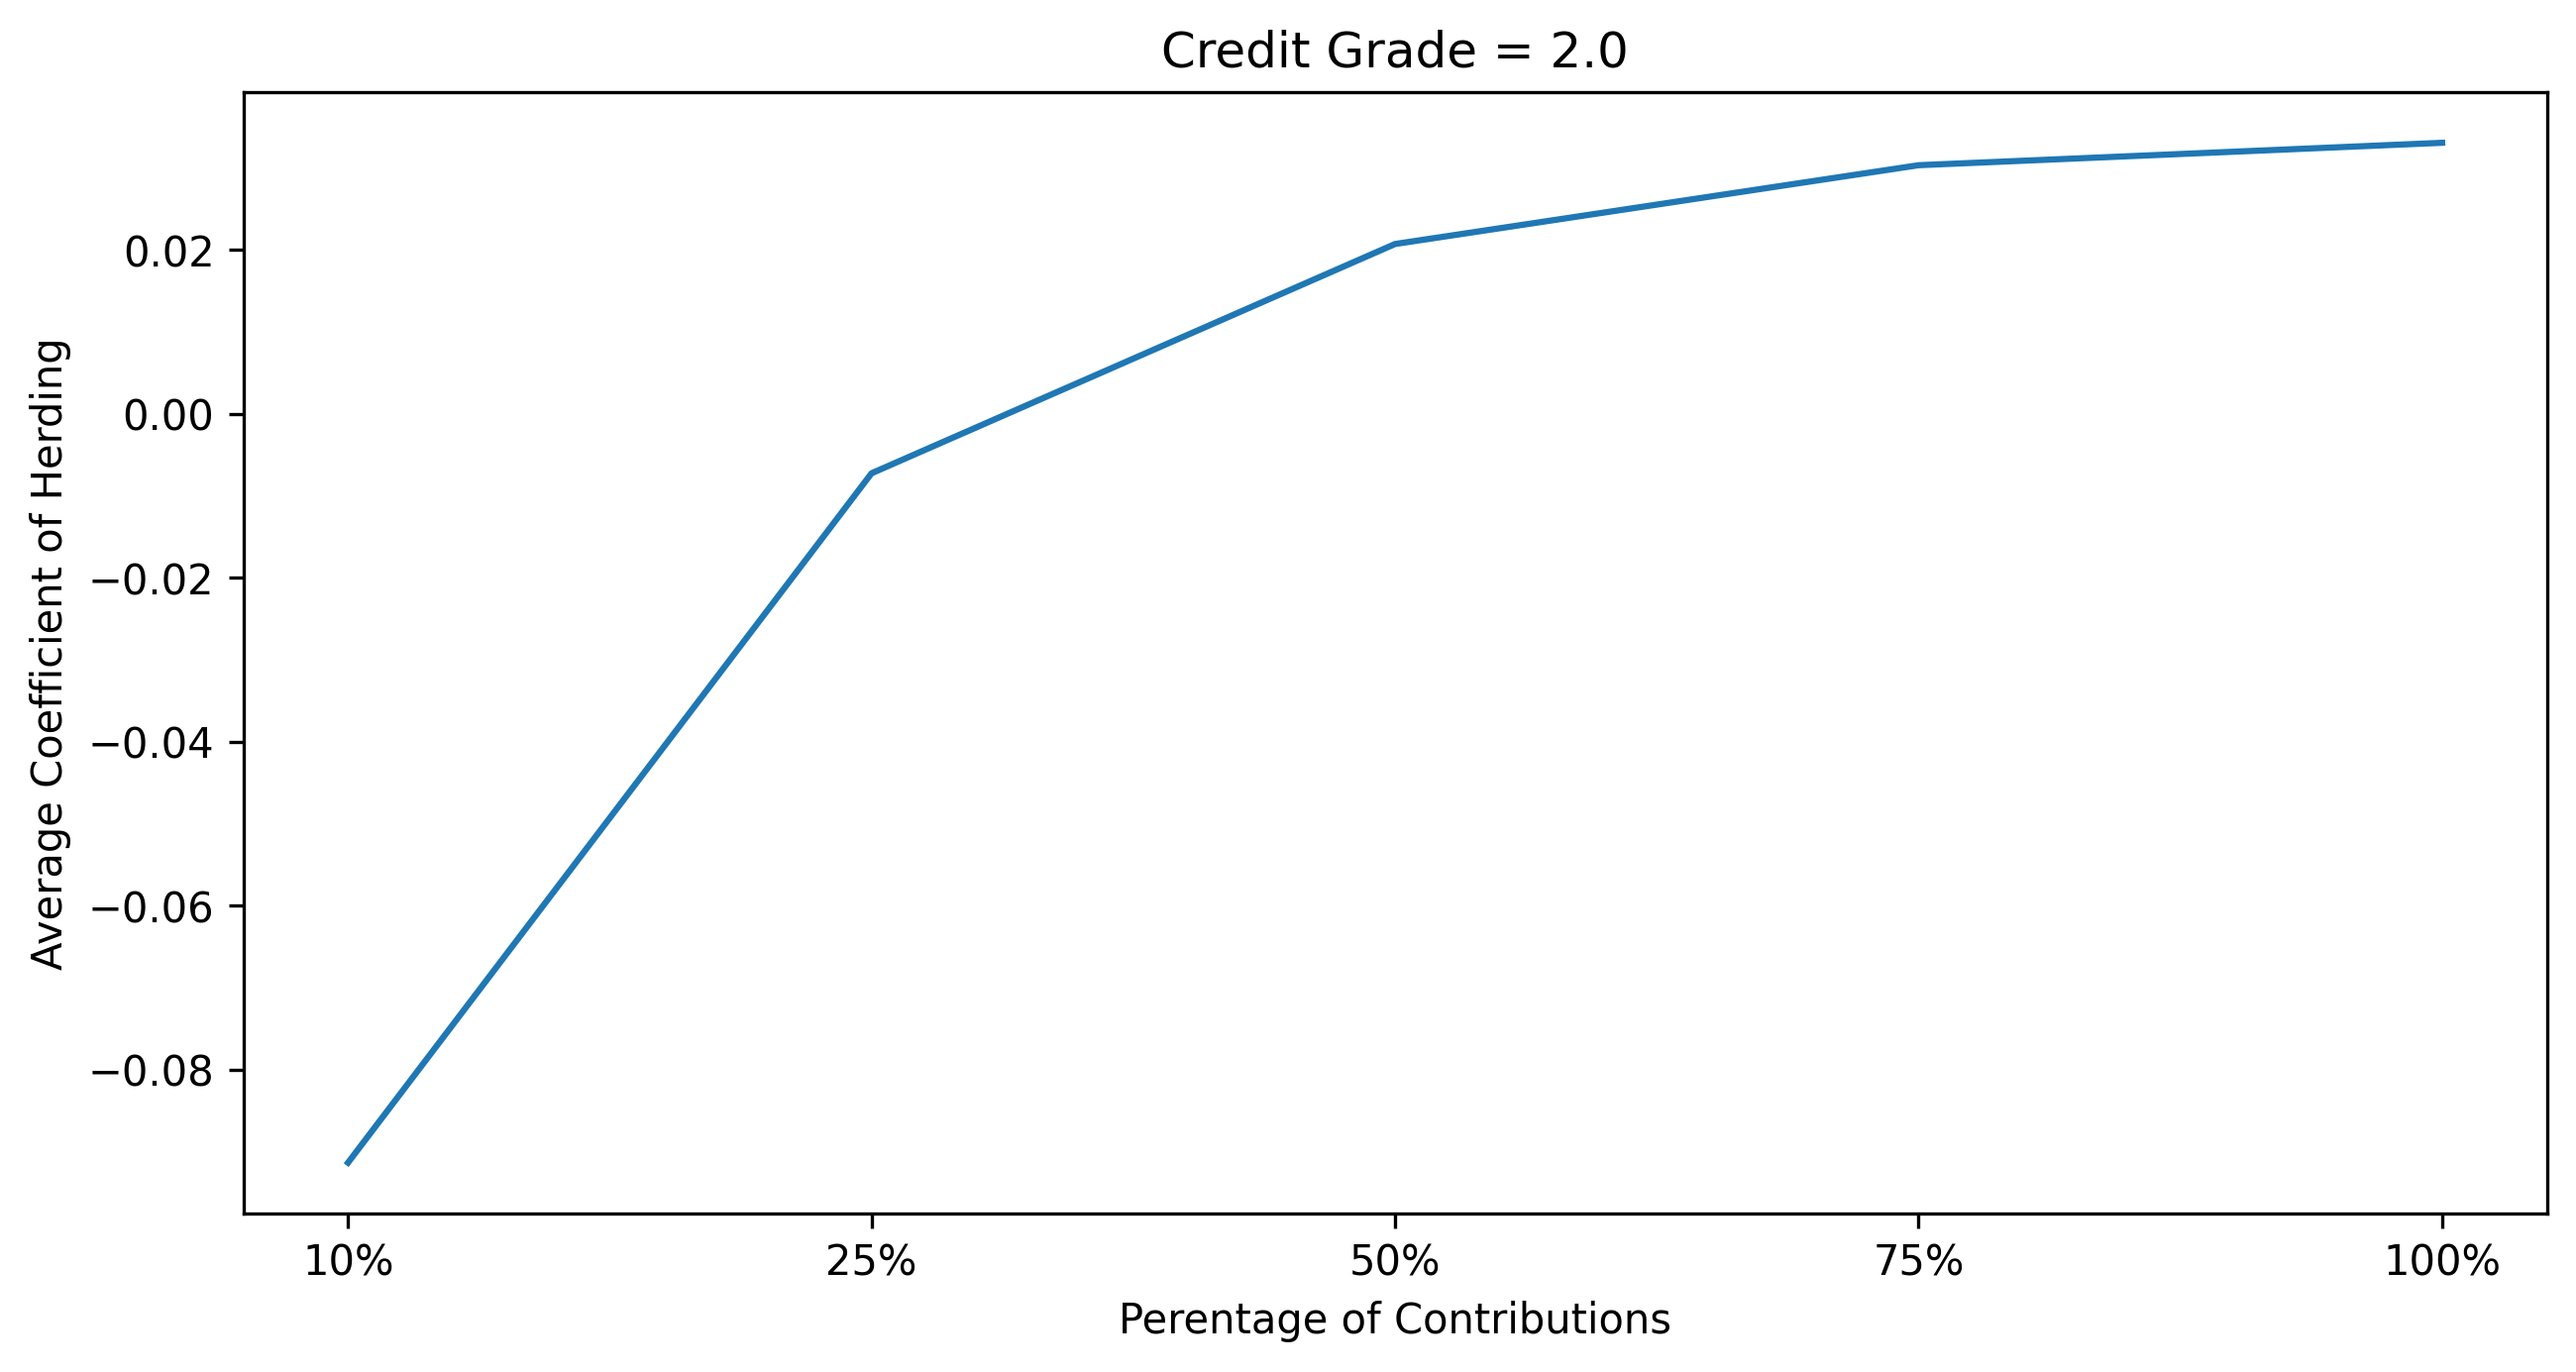

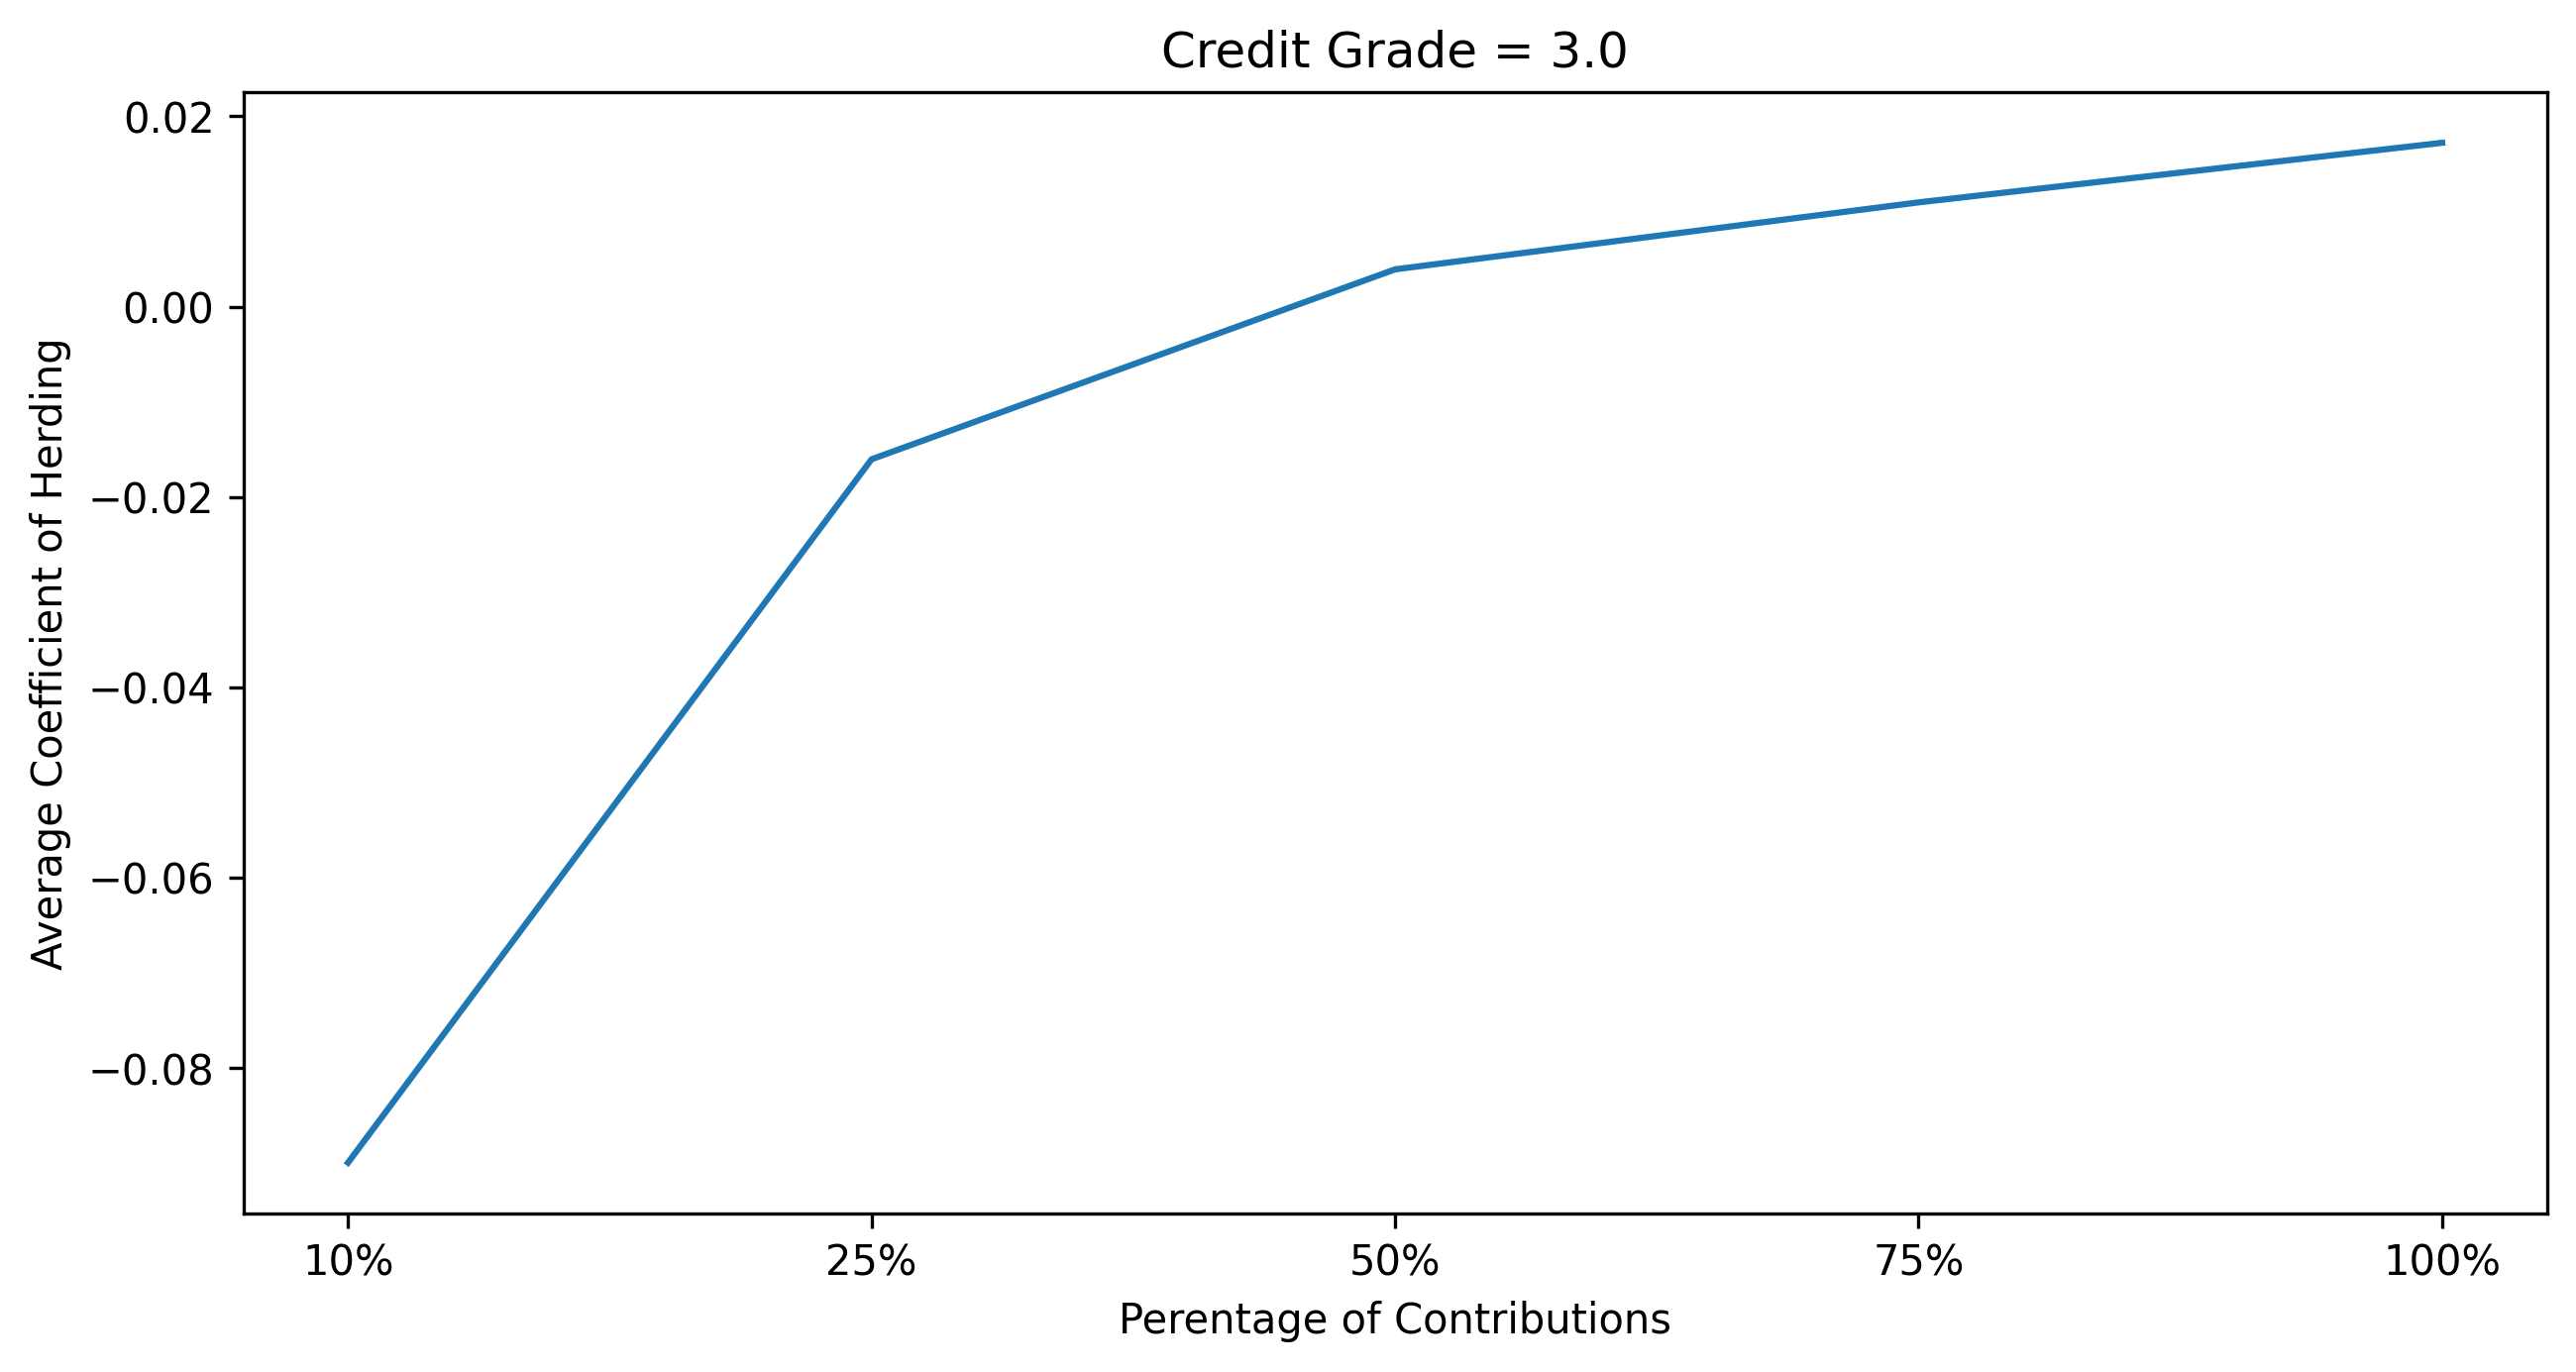

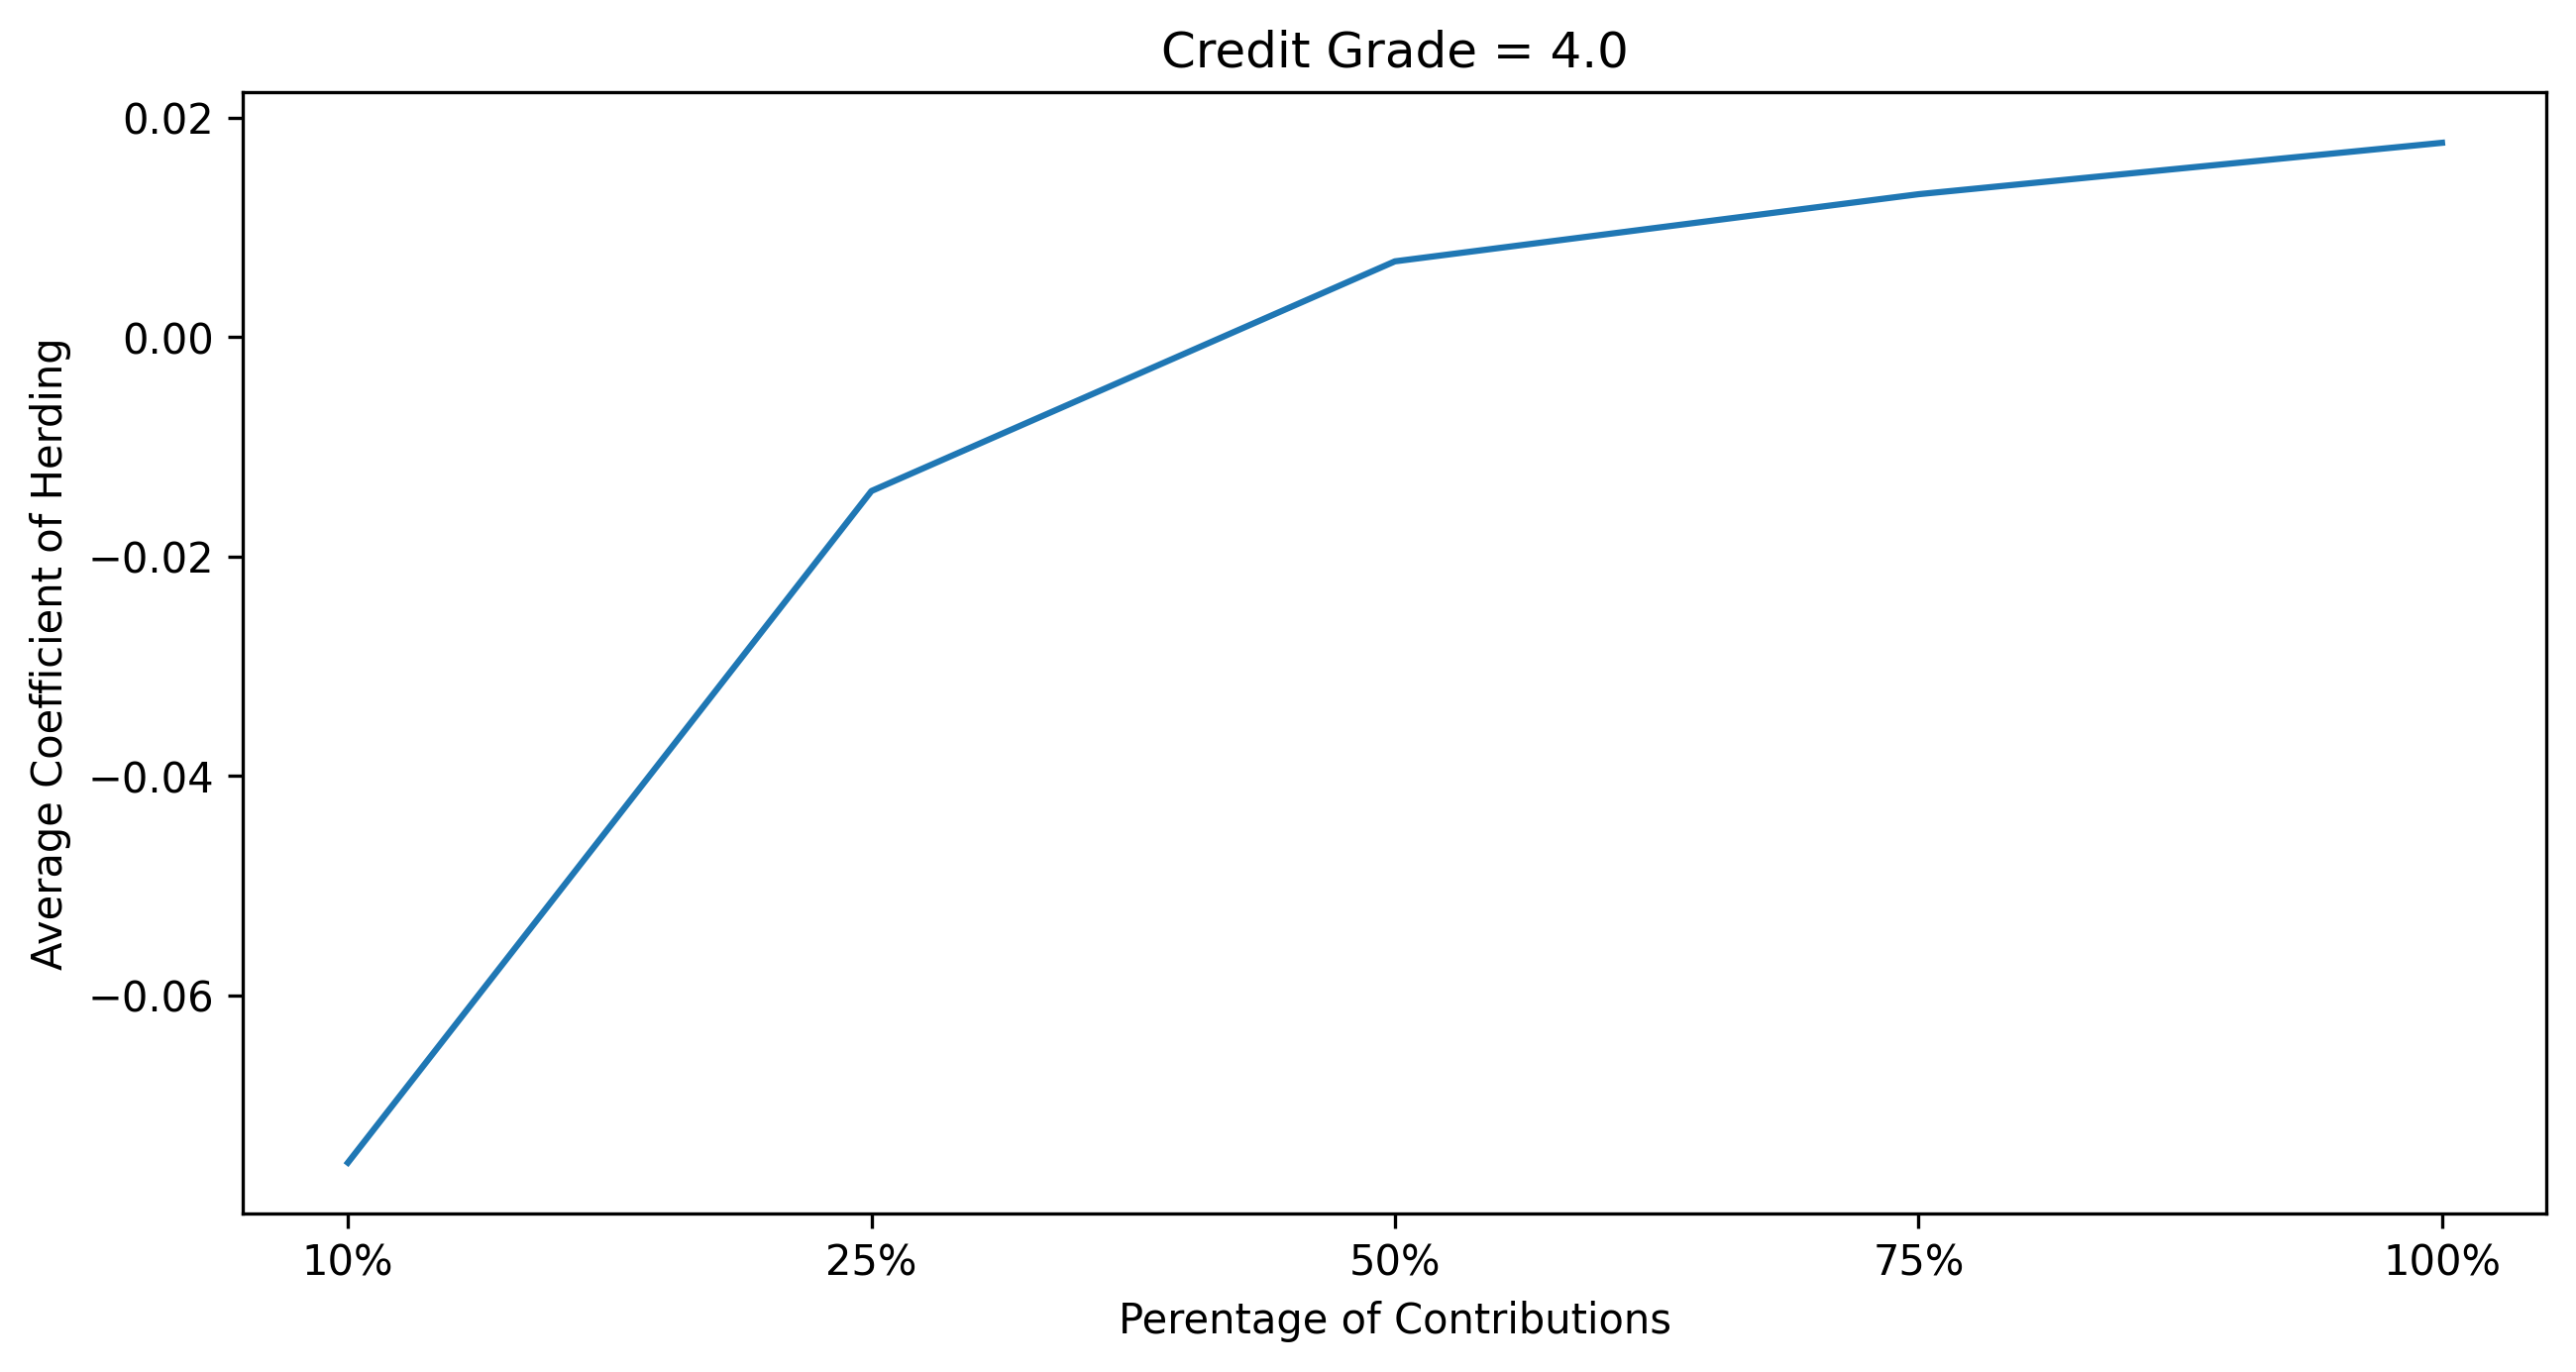

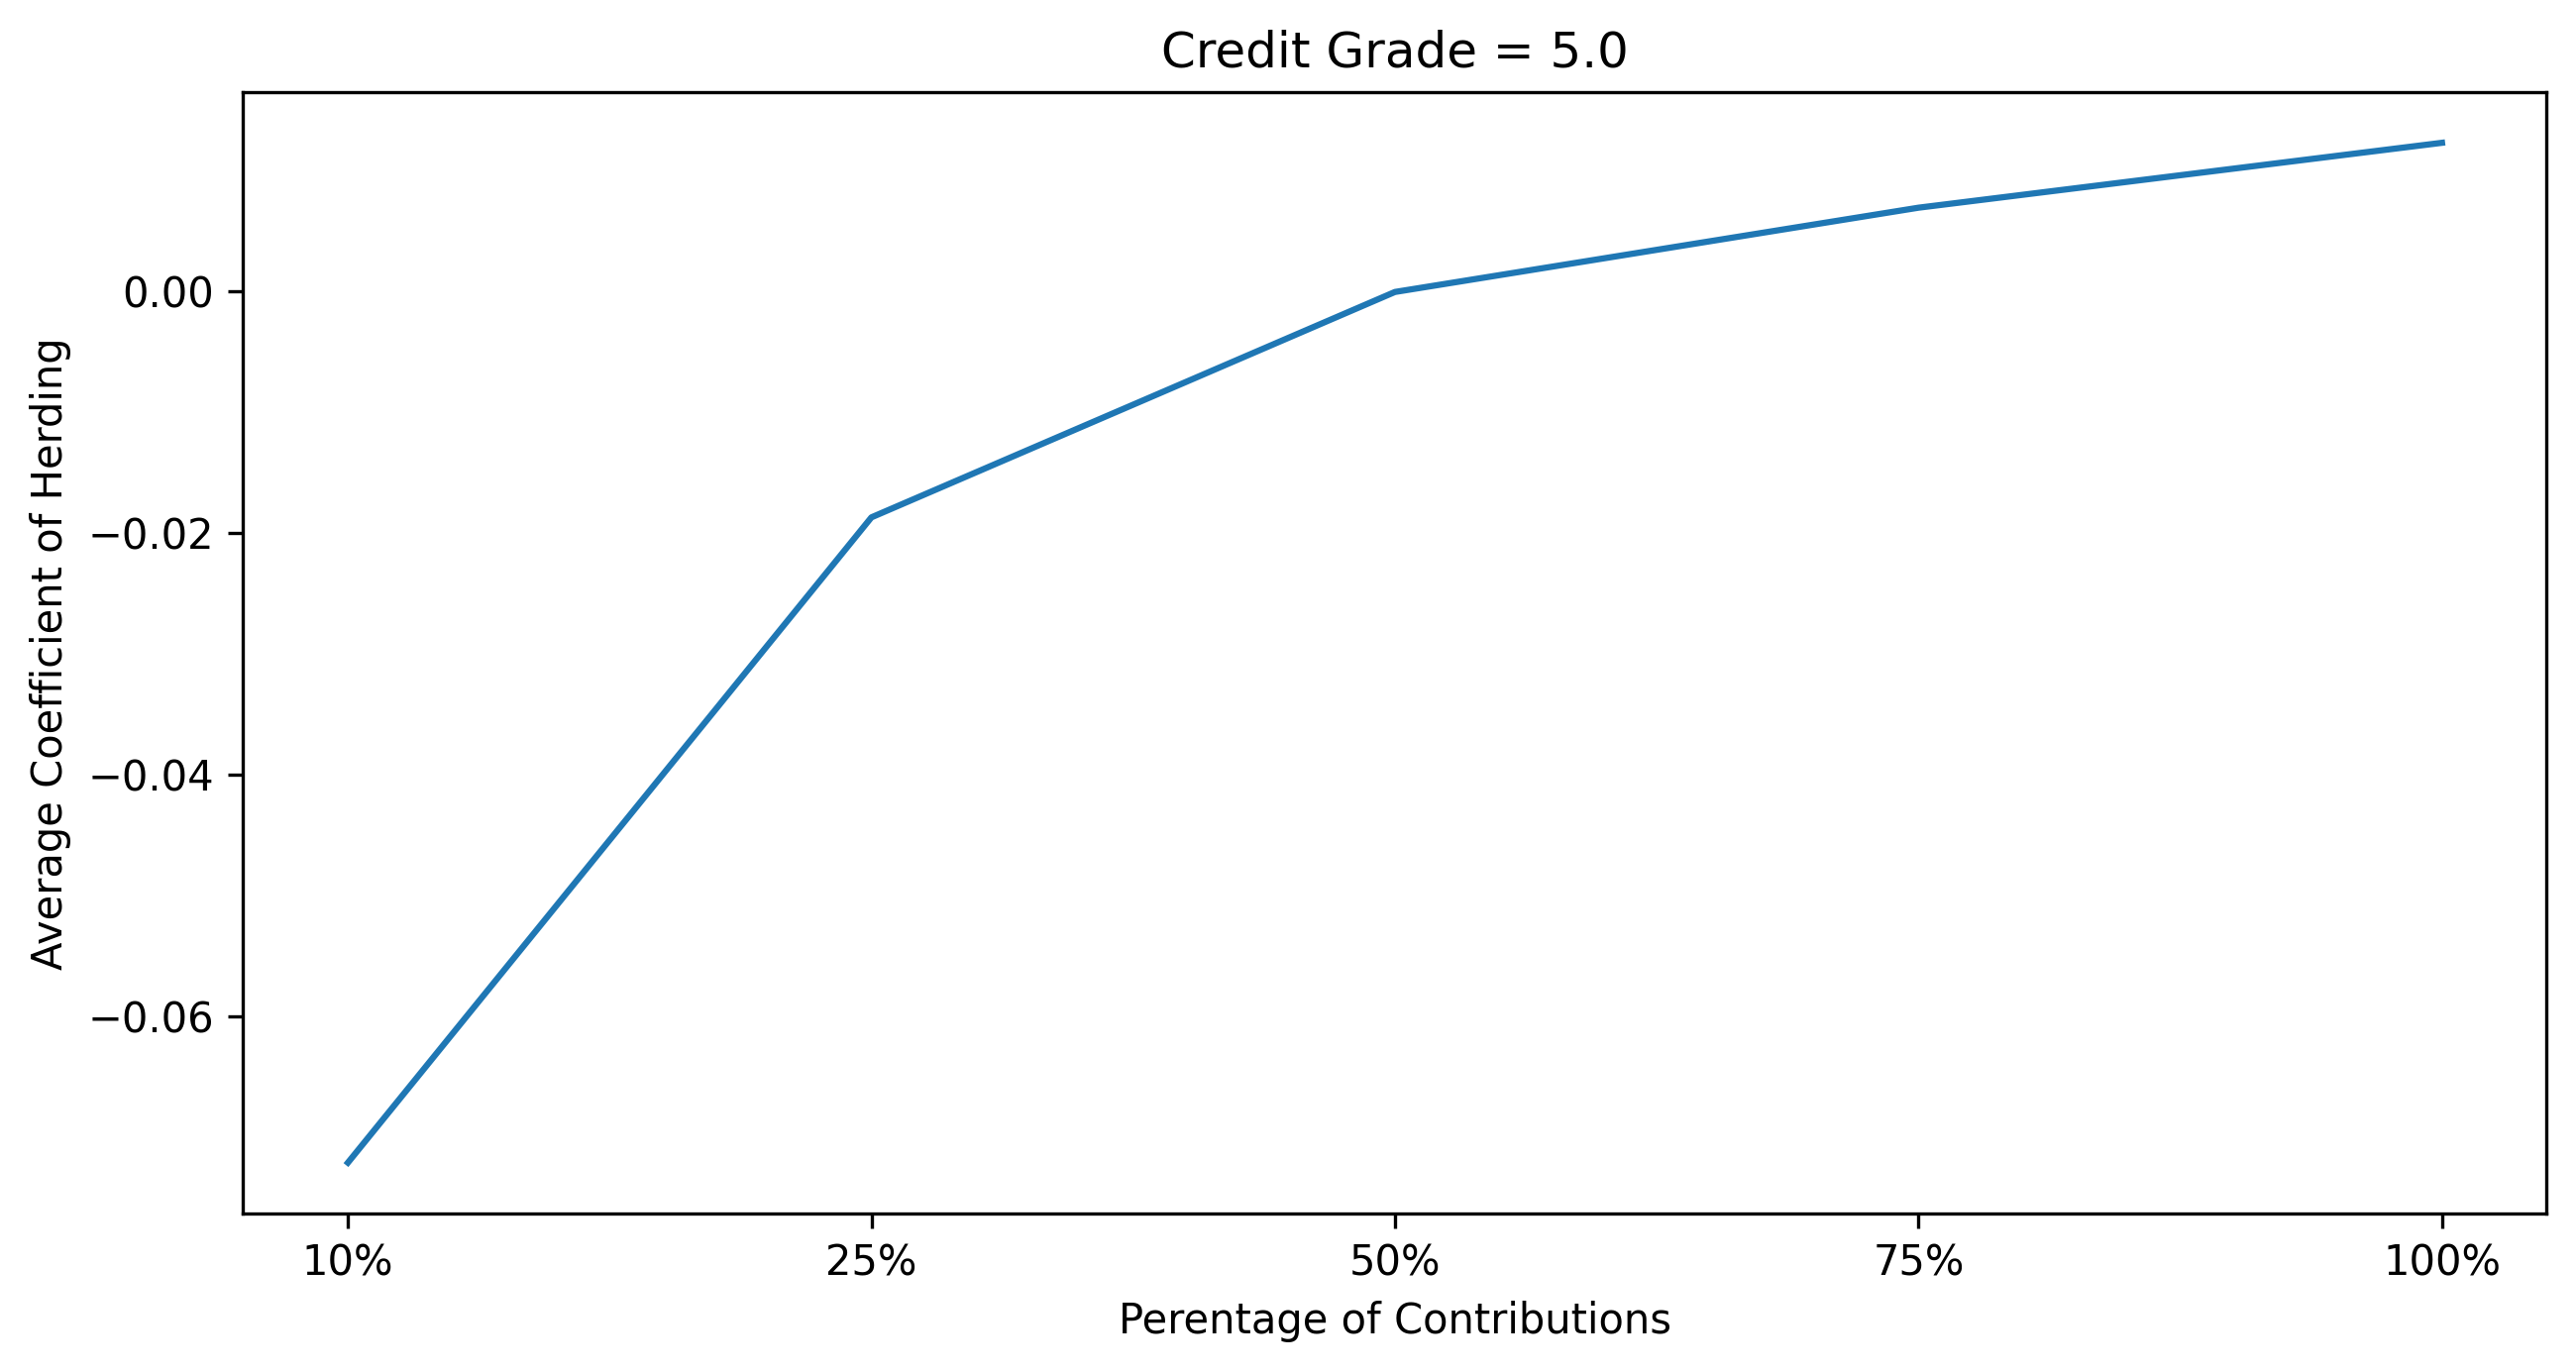

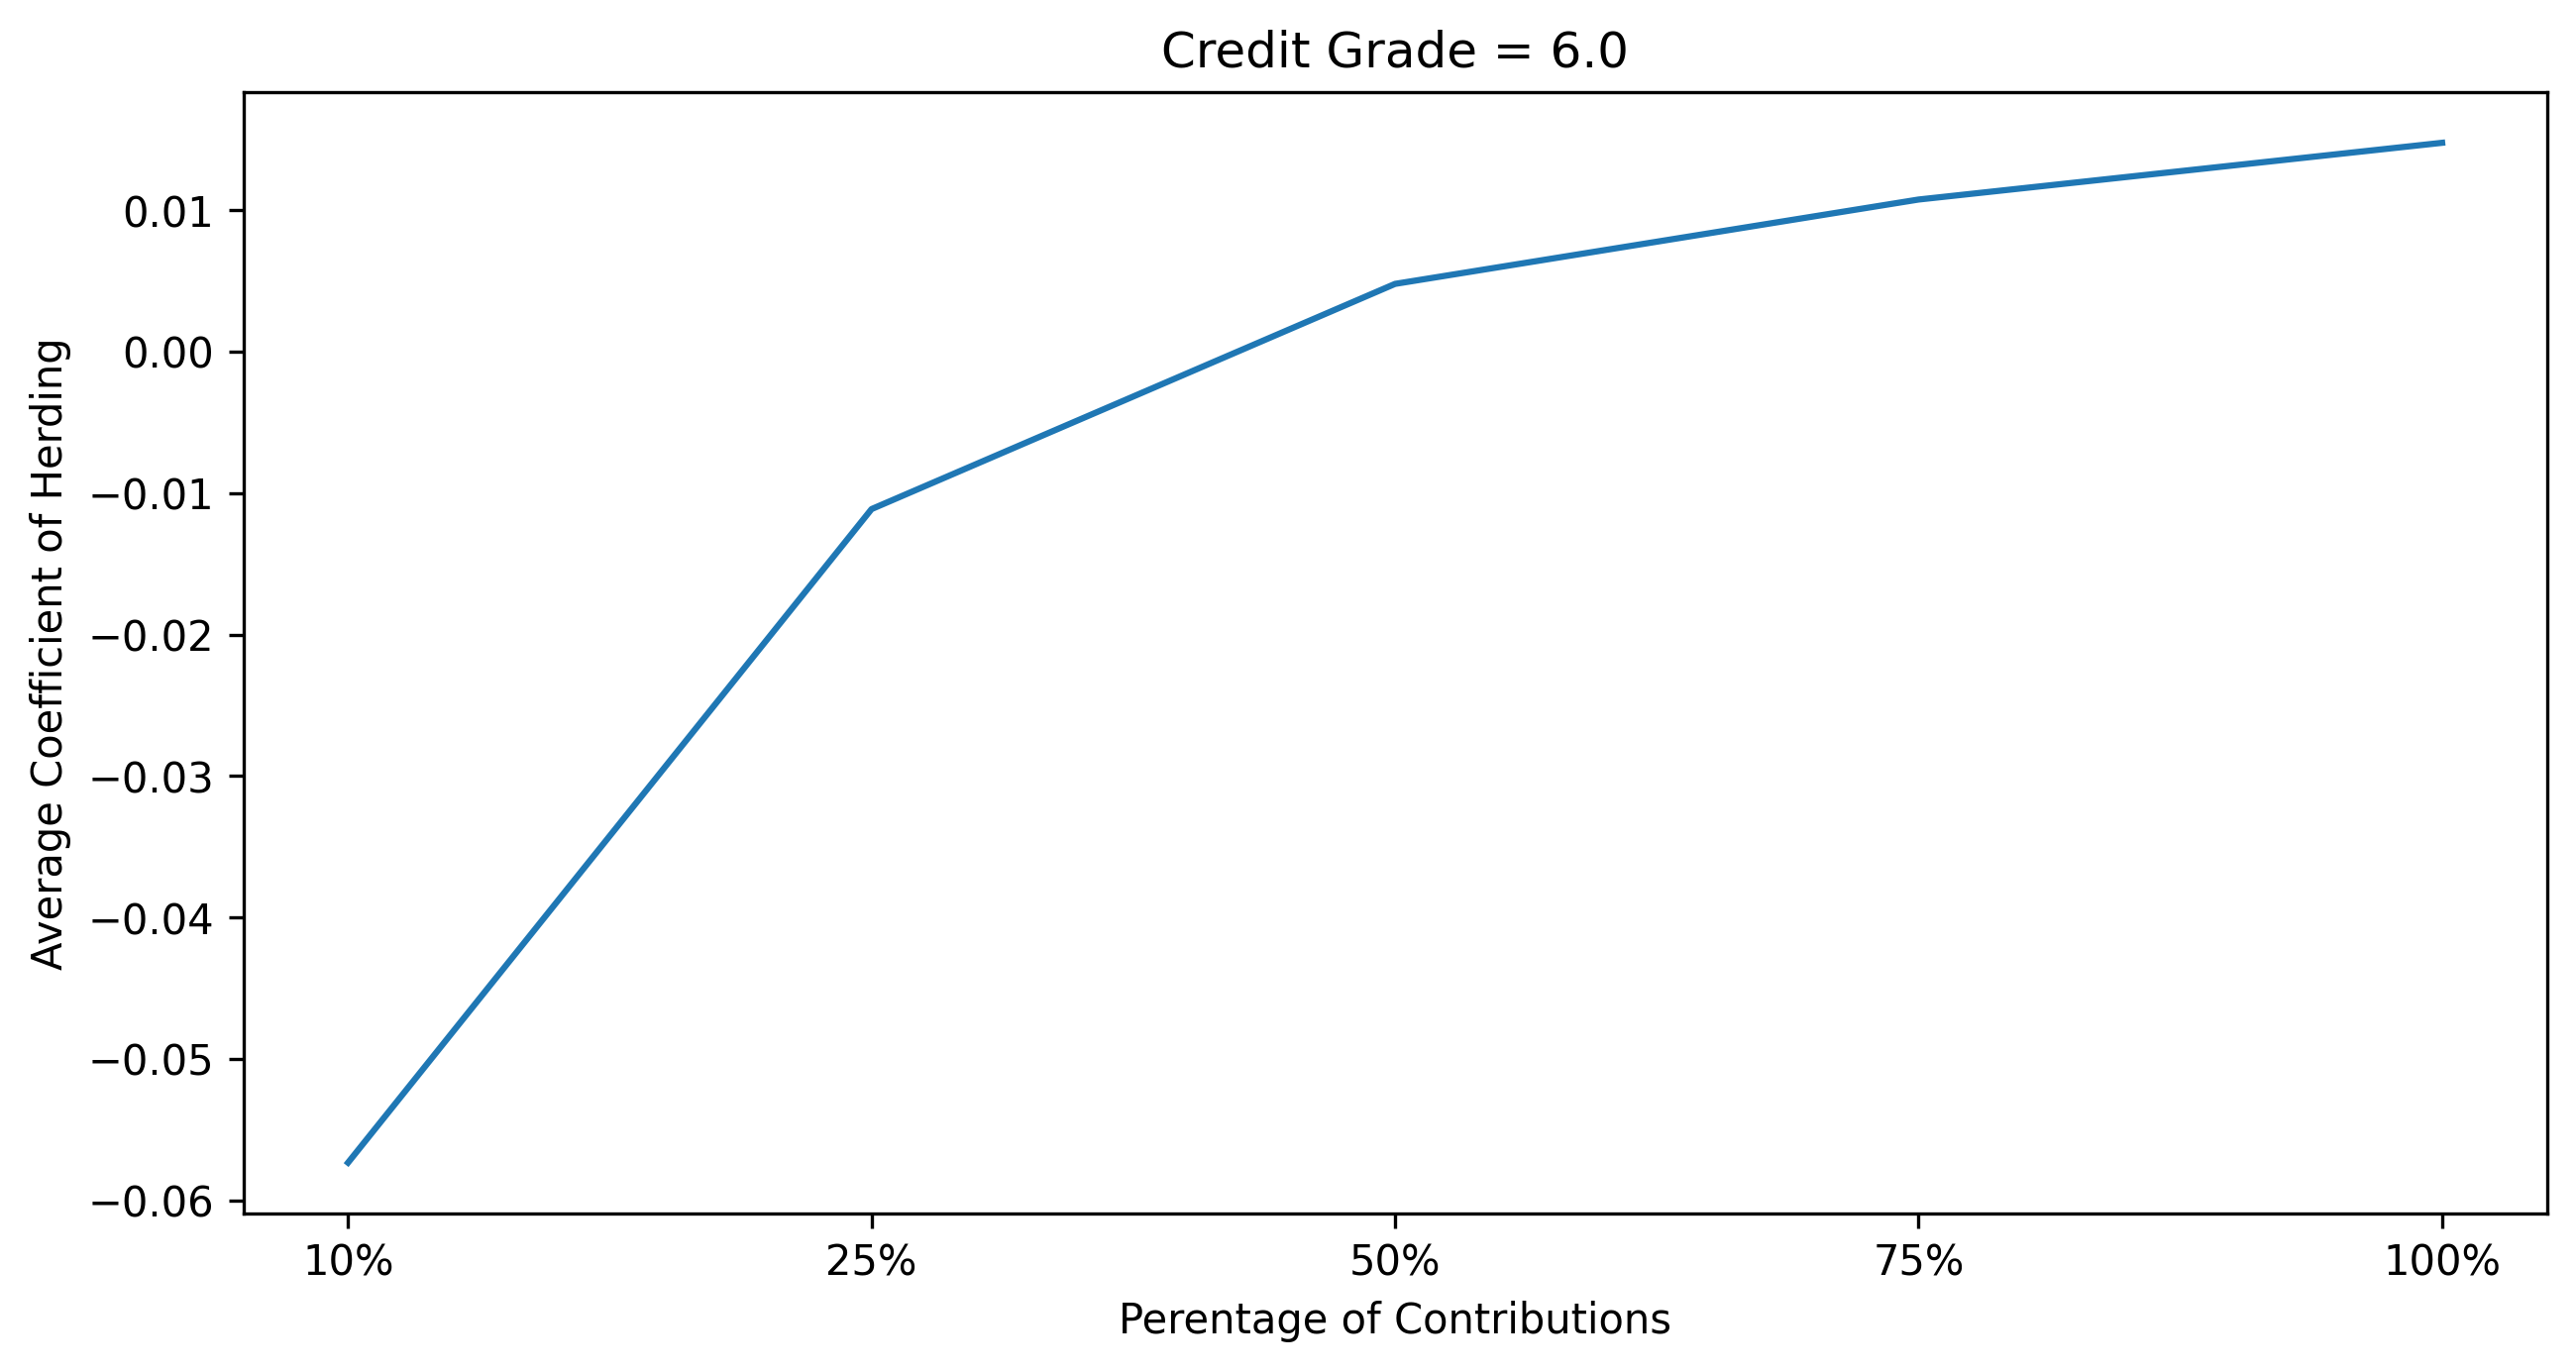

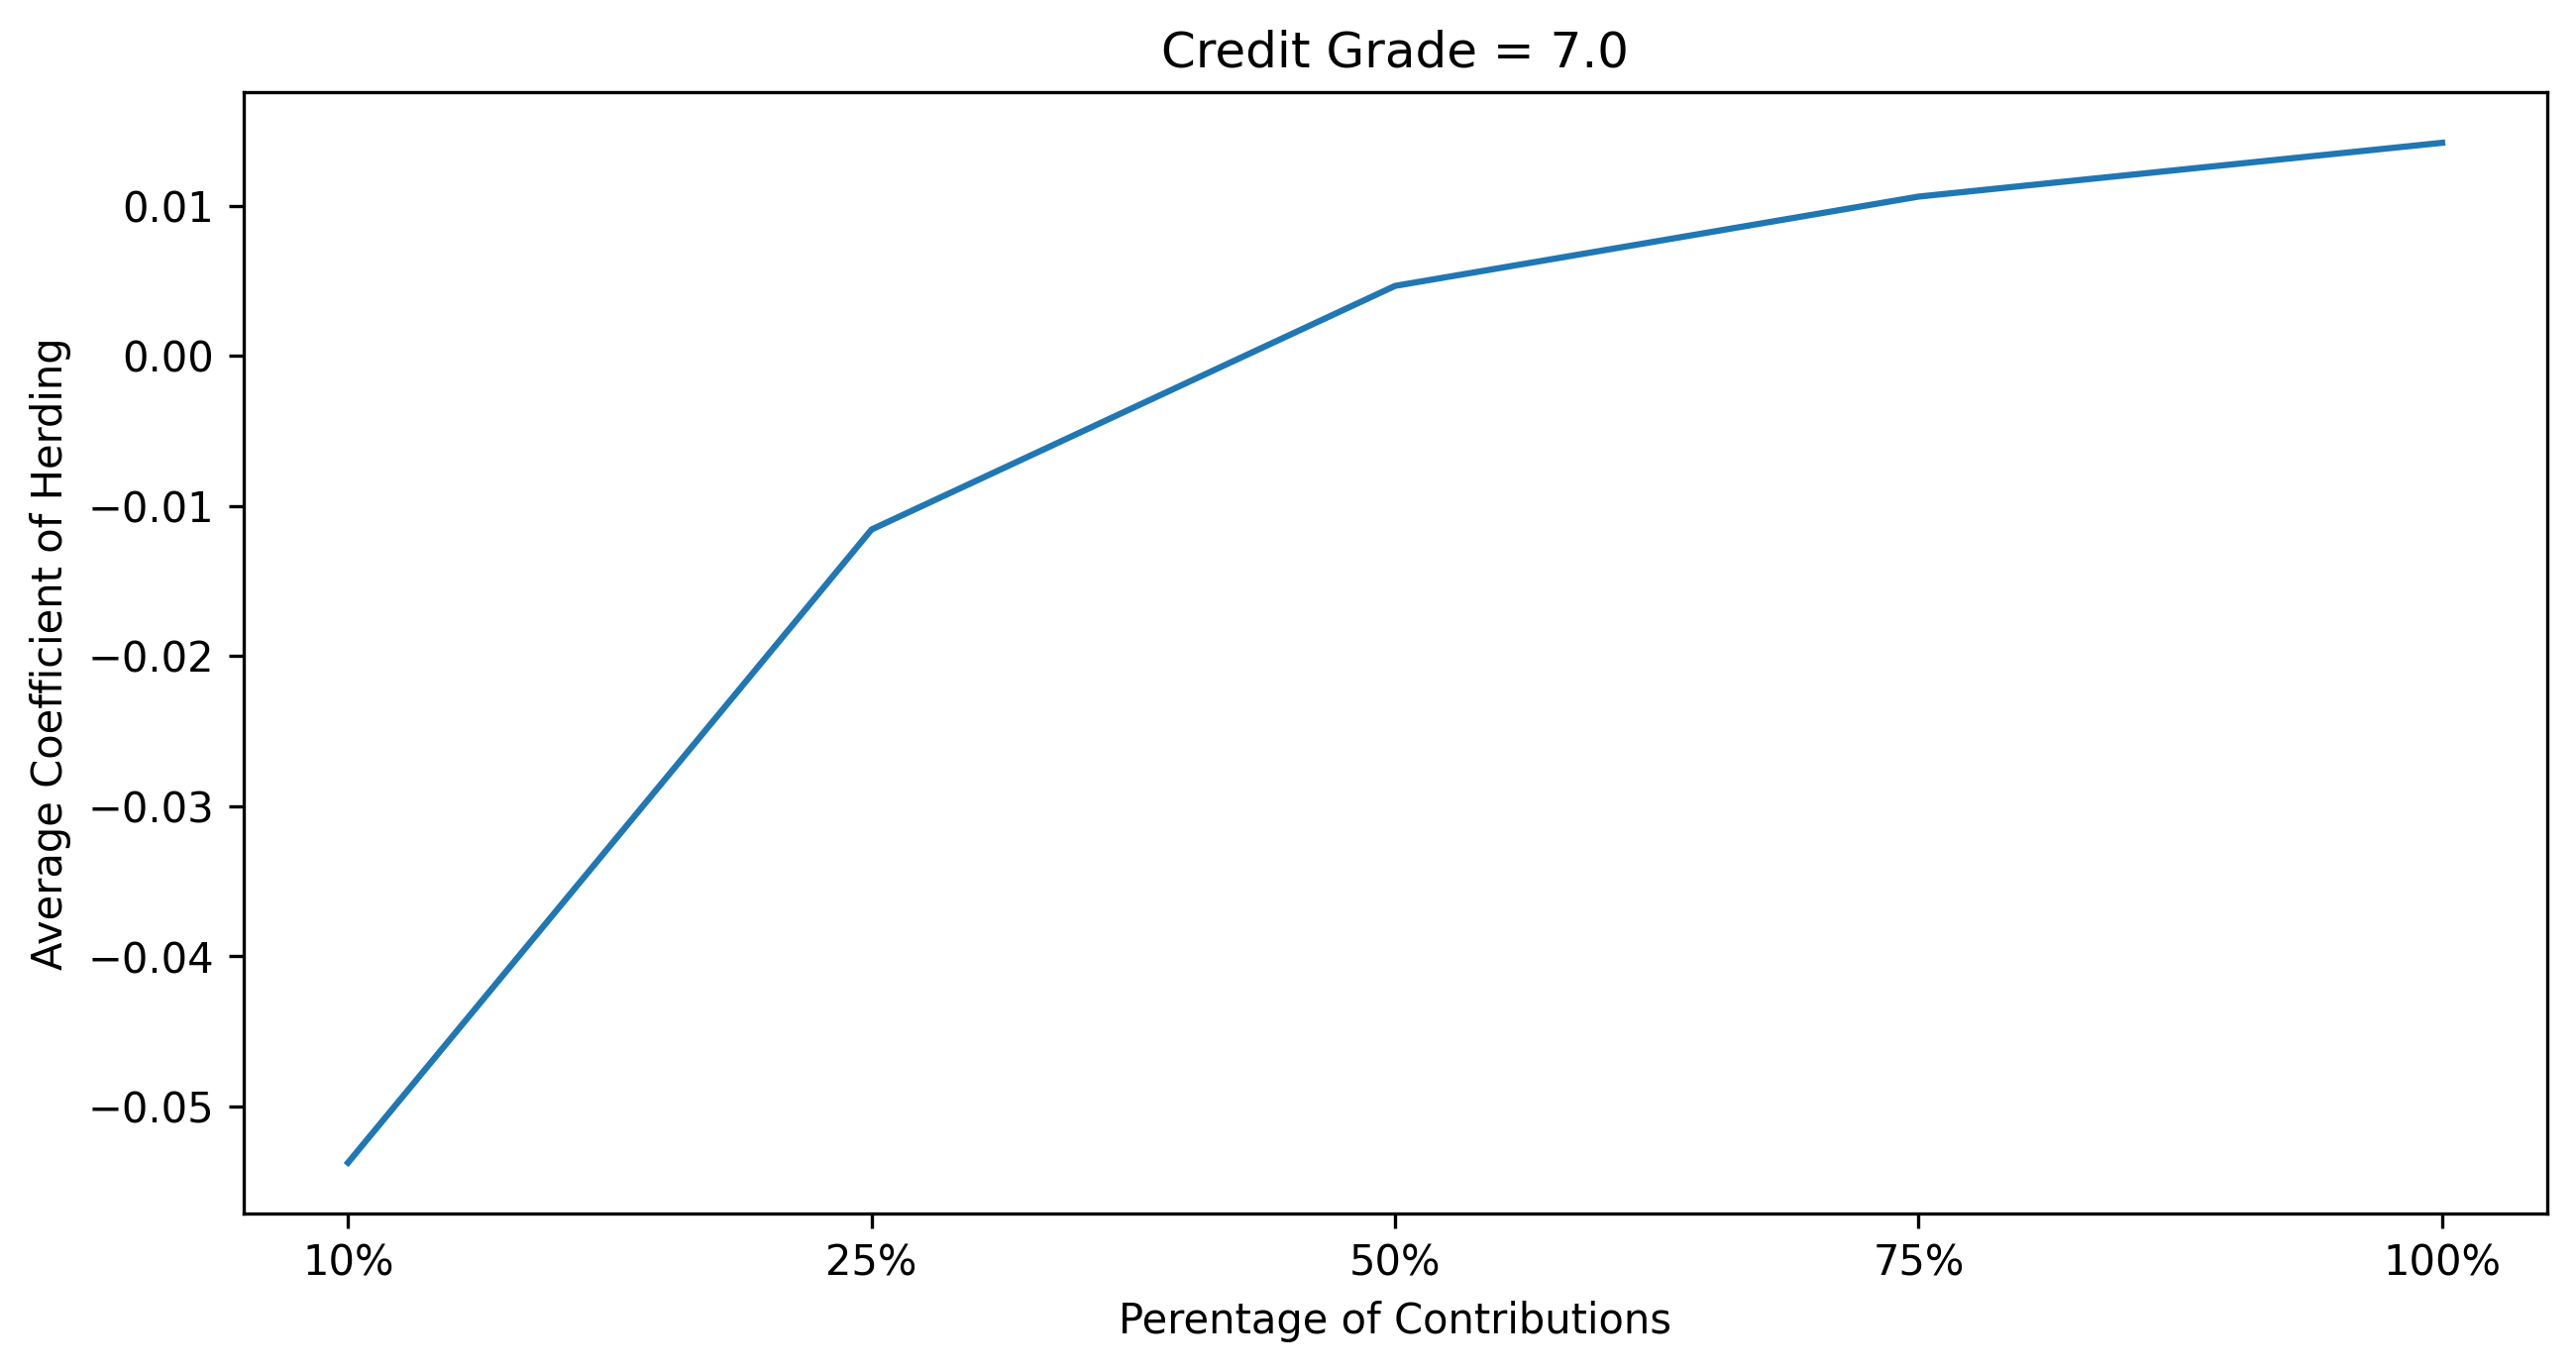

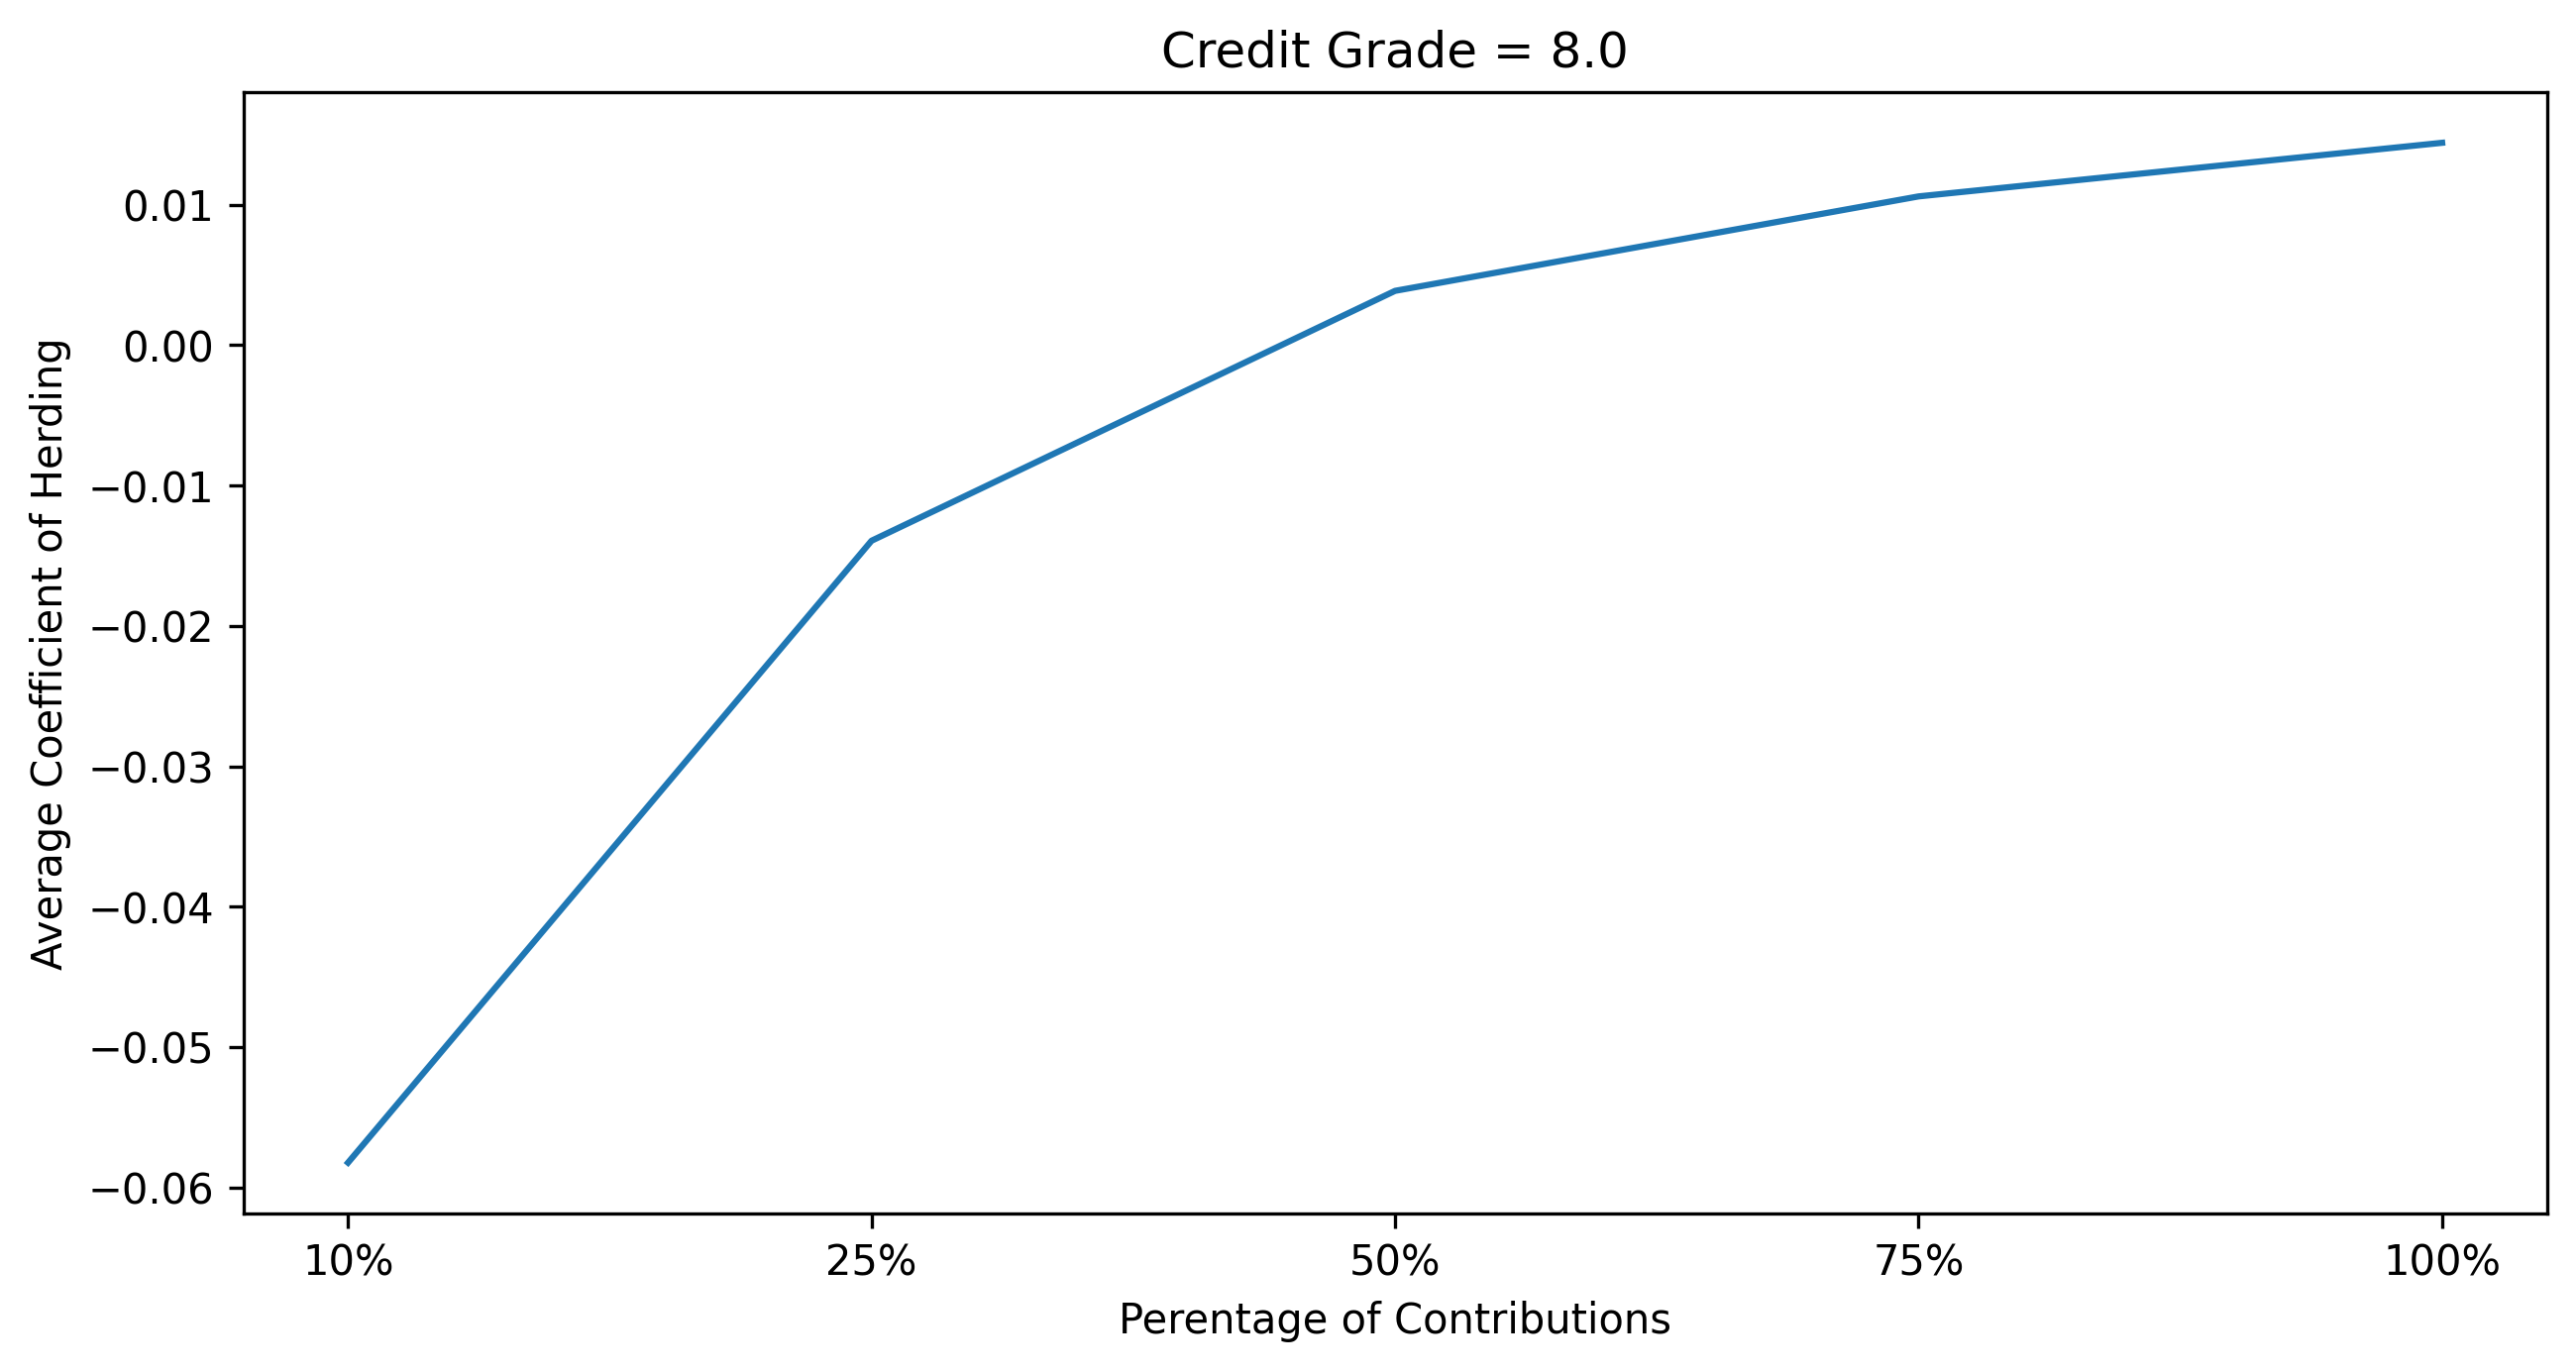

In [27]:
for credit_grade in sorted(data['CreditGrade'].unique())[2:]:
    var_data = data[data['CreditGrade']==credit_grade][labels]
    var_data= var_data.dropna()
    for label in labels:
        var_data= var_data[var_data[label] != -2]
        
    plt.figure(figsize=(10,5), dpi=300)
    plt.plot(var_data.dropna().describe()[1:2].T.values)
    plt.xticks([0,1,2,3,4], ['10%', '25%', '50%', '75%', '100%'])
    plt.ylabel('Average Coefficient of Herding')
    plt.xlabel('Perentage of Contributions')
    plt.title(f'Credit Grade = {credit_grade}')
    plt.show()